--------------------
#### Movie Sentiment Analysis 

- IMDB dataset
- Count Vectors
- Multinomial naive bayes
- Evaluate
----------------------

#### dataset 

can be downloaded from this Kaggle link.https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

The file contains 50,000 records and two columns: review and sentiment. 

The review column contains text for the review and the sentiment column contains sentiment for the review. 

The sentiment column can have two values i.e. "positive" and "negative" which makes our problem a binary classification problem.

In [1]:
import pandas as pd
import numpy as np

#### Importing and Analyzing the Dataset

In [2]:
location = r'D:\AI-DATASETS\02-MISC-large\keras\datasets\IMDB-cleaned-text.csv'

In [3]:
movie_reviews = pd.read_csv(location)

In [4]:
movie_reviews.isnull().values.any()

False

In [5]:
movie_reviews.shape

(50000, 6)

In [6]:
pd.set_option('max_colwidth', None)

In [7]:
movie_reviews.sample(3)

,Unnamed: 0,review,sentiment,contractions,ExpandedText,CleanedText
40957,40957,"A not bad but also not so great heist film. Kirk Douglas is a recently released from prison safe-cracker who, after turning down an offer from the Mob, decides to pull the job himself. He recruits circus gymnast Giuliano Gemma. Mayhem ensues. Douglas and Gemma soon find themselves pursued by mafia goon Romano Puppo as well as entangled in a really goofy love triangle with Douglas's infinitely patient girlfriend (Florinda Bolkan). Director Michele Lupo keeps the pace moving quickly and there's at least one excellent and creative car chase sequence involving Puppo & Gemma. Though an Italian production, most of the filming appears to have been done in Germany. Douglas is fine, not just slumming it in an Giallo quickie. The striking Bolkan gives a terrific performance. The music is by Ennio Morricone and the cinematography is by the great Tonino Delli Colli, who managed to work with everyone in Italy (from Wertmuller and Fellini to Pasolini and Leone).",negative,[],"A not bad but also not so great heist film. Kirk Douglas is a recently released from prison safe-cracker who, after turning down an offer from the Mob, decides to pull the job himself. He recruits circus gymnast Giuliano Gemma. Mayhem ensues. Douglas and Gemma soon find themselves pursued by mafia goon Romano Puppo as well as entangled in a really goofy love triangle with Douglas's infinitely patient girlfriend (Florinda Bolkan). Director Michele Lupo keeps the pace moving quickly and there is at least one excellent and creative car chase sequence involving Puppo & Gemma. Though an Italian production, most of the filming appears to have been done in Germany. Douglas is fine, not just slumming it in an Giallo quickie. The striking Bolkan gives a terrific performance. The music is by Ennio Morricone and the cinematography is by the great Tonino Delli Colli, who managed to work with everyone in Italy (from Wertmuller and Fellini to Pasolini and Leone).",A not bad but also not so great heist film Kirk Douglas is recently released from prison safe cracker who after turning down an offer from the Mob decides to pull the job himself He recruits circus gymnast Giuliano Gemma Mayhem ensues Douglas and Gemma soon find themselves pursued by mafia goon Romano Puppo as well as entangled in really goofy love triangle with Douglas infinitely patient girlfriend Florinda Bolkan Director Michele Lupo keeps the pace moving quickly and there is at least one excellent and creative car chase sequence involving Puppo Gemma Though an Italian production most of the filming appears to have been done in Germany Douglas is fine not just slumming it in an Giallo quickie The striking Bolkan gives terrific performance The music is by Ennio Morricone and the cinematography is by the great Tonino Delli Colli who managed to work with everyone in Italy from Wertmuller and Fellini to Pasolini and Leone
4222,4222,okay... first to Anne rice BOOK fans....<br /><br />sure lestat's eyes are not blue...sure he isn't blond in this movie... but even though Marius is not lestat's maker...even though they COMPLETELY altered the story.....<br /><br />how can u say its not a good movie..<br /><br />this movie...is the BEST vampire movie i ever saw...and lestat is pictured perfectly in it....maybe not his features...but i don't think one can find a better lestat....the way he speaks...and the way he looks at mere mortals...his arrogance..and sheer love for fame is pictured flawlessly.<br /><br />if u for once...consider it just a movie..and not try and relate every scene to the book...u will love the movie as much as i do.<br /><br />now...to the non readers..<br /><br />be prepared to fall absolutely in love with this movie....it has every thing....and the goth music...is like an added treat... the dialogues...are beautiful...and catching...and even though its a vampire movie..u will find yourself smiling...at the wit of the characters..

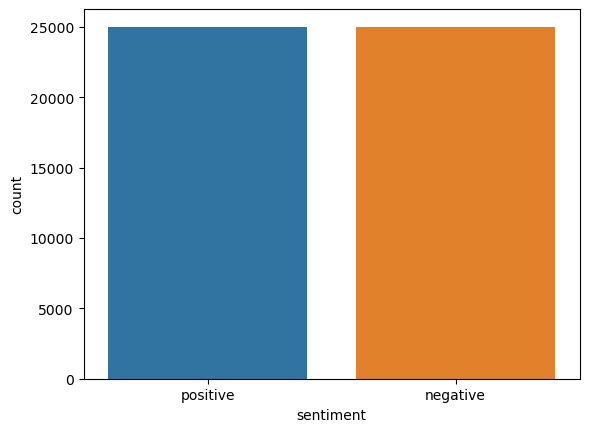

In [8]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews);

Next, we need to convert our labels into digits. 

Since we only have two labels in the output i.e. "positive" and "negative".

We can simply convert them into integers by replacing "positive" with digit 1 and negative with digit 0

In [9]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Finally, we need to divide our dataset into train and test sets. The train set will be used to train our deep learning models while the test set will be used to evaluate how well our model performs.

We can use train_test_split method from the sklearn.model.selection module

In [12]:
X = movie_reviews['CleanedText']

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size   = 0.20, 
                                                    random_state= 42)

#### train a count Vectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
%%time
# Create count vectorizer
vectorizer = CountVectorizer()

train_matrix = vectorizer.fit_transform(X_train)

Wall time: 7.33 s


In [18]:
%%time
test_matrix = vectorizer.transform(X_test)

Wall time: 2.02 s


#### train a ML model

**Naive Bayes**

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier on the training data
mnb.fit(train_matrix, y_train)

MultinomialNB()

In [23]:
# Make predictions on the test data
y_pred = mnb.predict(test_matrix)

#### Evaluate

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8482
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.84      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test, y_pred)

array([[4361,  600],
       [ 918, 4121]], dtype=int64)

In [28]:
# FALSE POSITIVE
X_test[(y_test==0) & (y_pred ==1)]

# Same as
# X_test[y_pred_class > y_test==0]

24712                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [29]:
# Calculate the predicted proobabilities for X_test
mnb.predict_proba(test_matrix)[:20]

array([[4.98376456e-07, 9.99999502e-01],
       [5.09768093e-09, 9.99999995e-01],
       [1.00000000e+00, 1.98969408e-10],
       [2.03495930e-07, 9.99999797e-01],
       [9.99997670e-01, 2.33042839e-06],
       [3.63722995e-30, 1.00000000e+00],
       [9.87496304e-09, 9.99999990e-01],
       [9.99763150e-01, 2.36850347e-04],
       [9.99999999e-01, 7.94996084e-10],
       [1.00000000e+00, 1.70067110e-11],
       [9.99999927e-01, 7.32295705e-08],
       [1.14816397e-12, 1.00000000e+00],
       [1.00000000e+00, 3.83390343e-14],
       [9.99999840e-01, 1.59636767e-07],
       [1.00000000e+00, 5.92136193e-15],
       [1.23149229e-01, 8.76850771e-01],
       [8.12171376e-03, 9.91878286e-01],
       [5.47597374e-03, 9.94524026e-01],
       [1.67815352e-01, 8.32184648e-01],
       [9.68503611e-01, 3.14963892e-02]])

In [30]:
mnb.predict_proba(test_matrix).shape

(10000, 2)

In [31]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
y_pred_proba = mnb.predict_proba(test_matrix)[:, 1]
y_pred_proba

array([9.99999502e-01, 9.99999995e-01, 1.98969408e-10, ...,
       4.36525710e-01, 2.44968414e-03, 1.01472581e-01])

In [28]:
print(y_test.shape)
print(y_pred_proba.shape)

(10000,)
(10000,)


In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

In [33]:
# Calculate AUC

roc_auc_score(y_test, y_pred_proba)

0.9194087768299822

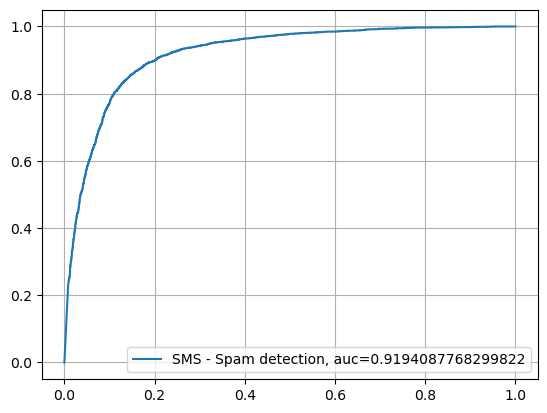

In [34]:
import matplotlib.pyplot as plt
y_pred_proba = mnb.predict_proba(test_matrix)[:,1]

# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="SMS - Spam detection, auc="+str(auc))
plt.legend(loc=4)
plt.grid();

#### Explore the most freq pos/neg words

In [35]:
movie_reviews.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [36]:
# save the positive & negative msgs
X_negative  = movie_reviews[(movie_reviews.sentiment == 'negative')].CleanedText
X_positive  = movie_reviews[(movie_reviews.sentiment == 'positive')].CleanedText

**Negative reviews**

In [37]:
words_neg = ' '.join(X_negative)

In [38]:
#!pip install wordcloud

In [39]:
from wordcloud import WordCloud, STOPWORDS 

ModuleNotFoundError: No module named 'wordcloud'

In [37]:
%%time
# pip install wordcloud
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                     #stopwords = stopwords, 
                     min_font_size = 10).generate(words_neg) 

CPU times: total: 24.5 s
Wall time: 54 s


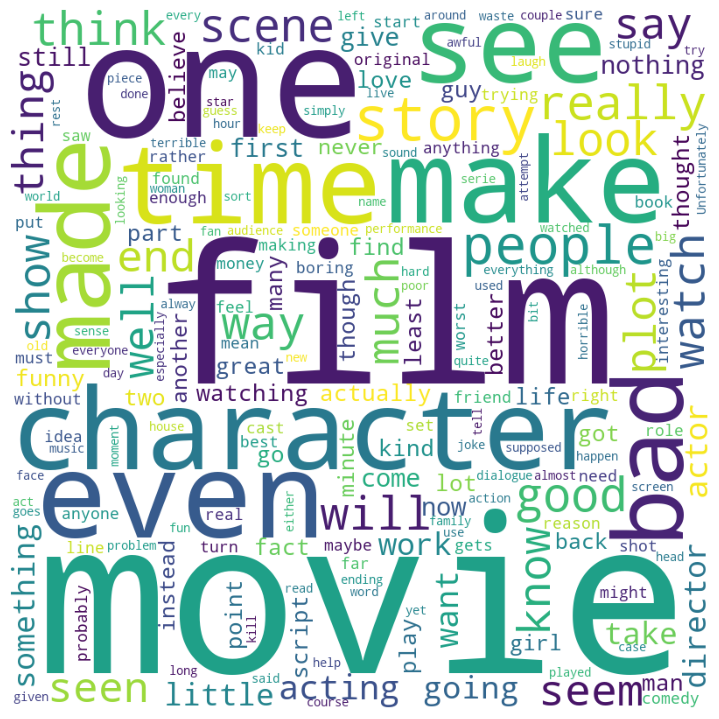

In [38]:
# plot the WordCloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

**Positive reviews**

In [39]:
words_pos = ' '.join(X_positive)

In [40]:
%%time
# pip install wordcloud
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                     #stopwords = stopwords, 
                     min_font_size = 10).generate(words_pos) 

CPU times: total: 27.5 s
Wall time: 58 s


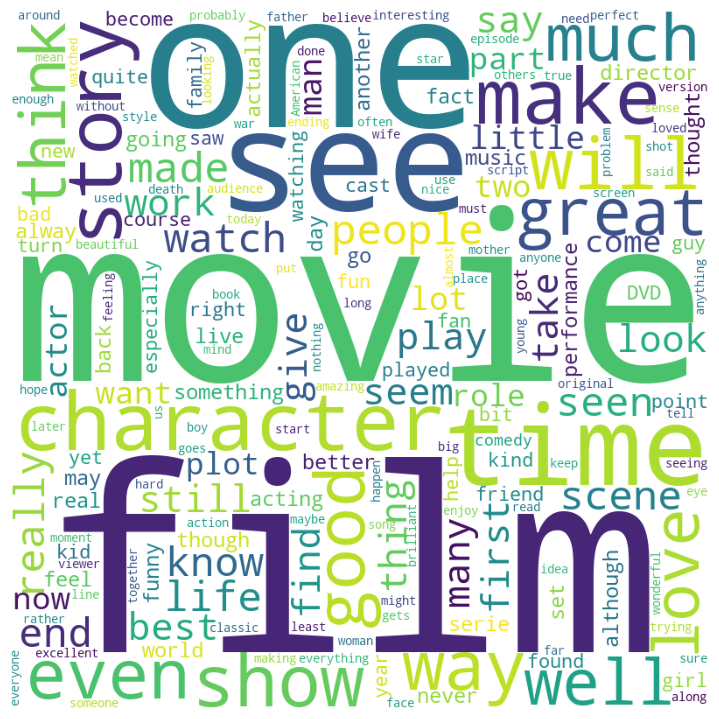

In [41]:
# plot the WordCloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

#### high freq pos/neg words

In [42]:
from collections import Counter

In [43]:
def word_frequency(text):
    # Tokenize the text into words
    words = text.split()

    # Use Counter to get the frequency distribution
    word_counts = Counter(words)

    return word_counts

**positive reviews**

In [44]:
# Example usage:
sample_text = words_pos
frequency_distribution = word_frequency(sample_text)

# Create a DataFrame from the frequency distribution
df = pd.DataFrame(frequency_distribution.items(), columns=['Word', 'Frequency'])

In [45]:
# Sort the DataFrame by 'Frequency' column in descending order
df = df.sort_values(by='Frequency', ascending=False)

# Resetting the index after sorting
df = df.reset_index(drop=True)

In [46]:
df.head(25)

,Word,Frequency
0,the,295084
1,and,170169
2,of,150514
3,is,141359
4,to,130133
5,in,92797
6,it,76009
7,that,67418
8,this,54315
9,not,50120


**negative reviews**

In [47]:
%%time
# Example usage:
sample_text = words_neg
frequency_distribution = word_frequency(sample_text)

# Create a DataFrame from the frequency distribution
df = pd.DataFrame(frequency_distribution.items(), columns=['Word', 'Frequency'])

CPU times: total: 1.62 s
Wall time: 3.45 s


In [48]:
# Sort the DataFrame by 'Frequency' column in descending order
df = df.sort_values(by='Frequency', ascending=False)

# Resetting the index after sorting
df = df.reset_index(drop=True)

In [83]:
df.head(25)

,Word,Frequency
0,the,279880
1,and,140078
2,of,135955
3,to,135540
4,is,133591
5,in,81717
6,it,78280
7,that,71383
8,this,66637
9,not,64997


#### sparsity assessment

In [63]:
# Convert to CSR matrix
X_csr = csr_matrix(test_matrix)

# Calculate sparsity
sparsity = 1.0 - (X_csr.nnz / (X_csr.shape[0] * X_csr.shape[1]))

print(f"Sparsity: {sparsity * 100:.2f}%")

Sparsity: 99.85%


#### Conclusion

- many of the top words are common among the positive and negative comments
- many top words seem like stop words
- need for more pre-processing
- need for a better vectorizer (pretrained Glove etc...)
- `dense representation` would give a better result